<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/MNIST_Pytorch_S4_Relu_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required Libraries 

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:

# CUDA?
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
print("CUDA Available?", device)
     

CUDA Available? cpu


Typical Structure 
=====================
1. Convolution Layer of 3 x 3 Kernel with Padding of 1 
2. ReLu
3. Maxpool 

Additional Structures
======================
1. Convolution Layer of 1 x 1 Kernel to consolidate without convolution 
2. Global Average Pooling 

Target: 
======

In this Implementation , I have

1. Network structure is C1 C2 c3 P1 C3 C4 C5 c6 P2 C7 C8 C9 GAP C10
2. NO of parameters is less than 50,000 ( 30,948)
3. 3 Layers  where the previous image added to the filtered output
4. Batch size 64 
5. Batch Normalization 



Result: 
======
1. Observed Train accuracy: 70.61%
2. Validation accuracy:75.93%
3. Number of parameters: 30,948


Analysis: 
========

1. The Validation accuracy improved even with less parameters
2. The steady increase in the validation accuracy is due to the addition of layers

In [3]:
from model import model3 as Net

Steps
========
1. Install Torch Summary
2. Print Summary of model

In [4]:
from model import print_model_summary
dropout_prob = 0.1
inputsize= (3, 32, 32)
print_model_summary(dropout_prob, inputsize, Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
         Dropout2d-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
         Dropout2d-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           1,024
             ReLU-10           [-1, 32, 32, 32]               0
      BatchNorm2d-11           [-1, 32, 32, 32]              64
        MaxPool2d-12           [-1, 32, 16, 16]               0
           Conv2d-13           [-1, 16, 16, 16]           4,608
             ReLU-14           [-1, 16,

G:\ERA_S8\model.py:362: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Steps
=======
This is the most important step 
1. Define Train loader and Test loader with only 1 worker (MNSIT is easy dataset)
   - Normalize - Yes that's the only thing i am going to apply on the data for now


In [5]:
#torch.manual_seed(1)
from dataset import get_train_loader, get_test_loader, get_classes
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

batch_size = 64
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = get_train_loader(batch_size, kwargs)
test_loader = get_test_loader(batch_size, kwargs)


Files already downloaded and verified


Steps
=======
1. Define Lists to capture training parameters and testing parameters 


In [6]:
from tqdm import tqdm
from model import get_train, get_test

train_losses = []
test_losses = []
train_acc = []
test_acc = []   

Steps
=====
This is where the real action takes place

1. Define Learning rate and Optimizer 
2. Train for the defined epoch
3. Iterate over the training sample based on the defined batch size
4. Validate on test dataset
5. Capture outcome in the list
6. Validate 
7. Print the result


In [7]:
from torch.optim.lr_scheduler import StepLR

model =  Net(dropout_prob=0.1).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
for epoch in range(1, 20):
    print('Currently Executing Epoch:', epoch)
    train_losses, train_acc = get_train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)  
    test_losses, test_acc = get_test(model, device, test_loader,test_losses, test_acc)
    #scheduler.step()

Currently Executing Epoch: 1


Loss=1.700316071510315 Batch_id=781 Accuracy=35.64: 100%|████████████████████████████| 782/782 [04:29<00:00,  2.90it/s]



Test set: Average loss: 1.3780, Accuracy: 4977/10000 (49.77%)

Currently Executing Epoch: 2


Loss=1.602117657661438 Batch_id=781 Accuracy=48.83: 100%|████████████████████████████| 782/782 [31:24<00:00,  2.41s/it]



Test set: Average loss: 1.1827, Accuracy: 5729/10000 (57.29%)

Currently Executing Epoch: 3


Loss=1.5228674411773682 Batch_id=781 Accuracy=54.89: 100%|███████████████████████████| 782/782 [04:12<00:00,  3.09it/s]



Test set: Average loss: 1.0379, Accuracy: 6296/10000 (62.96%)

Currently Executing Epoch: 4


Loss=2.269451141357422 Batch_id=781 Accuracy=58.09: 100%|████████████████████████████| 782/782 [04:12<00:00,  3.10it/s]



Test set: Average loss: 0.9701, Accuracy: 6579/10000 (65.79%)

Currently Executing Epoch: 5


Loss=1.0847712755203247 Batch_id=781 Accuracy=60.24: 100%|███████████████████████████| 782/782 [02:58<00:00,  4.39it/s]



Test set: Average loss: 0.9411, Accuracy: 6640/10000 (66.40%)

Currently Executing Epoch: 6


Loss=1.3274623155593872 Batch_id=781 Accuracy=62.34: 100%|███████████████████████████| 782/782 [02:59<00:00,  4.35it/s]



Test set: Average loss: 0.8678, Accuracy: 6916/10000 (69.16%)

Currently Executing Epoch: 7


Loss=1.2175524234771729 Batch_id=781 Accuracy=63.33: 100%|███████████████████████████| 782/782 [03:22<00:00,  3.87it/s]



Test set: Average loss: 0.8577, Accuracy: 6984/10000 (69.84%)

Currently Executing Epoch: 8


Loss=0.6082810163497925 Batch_id=781 Accuracy=64.64: 100%|███████████████████████████| 782/782 [03:17<00:00,  3.95it/s]



Test set: Average loss: 0.8187, Accuracy: 7109/10000 (71.09%)

Currently Executing Epoch: 9


Loss=1.5217427015304565 Batch_id=781 Accuracy=65.71: 100%|███████████████████████████| 782/782 [03:14<00:00,  4.01it/s]



Test set: Average loss: 0.8011, Accuracy: 7145/10000 (71.45%)

Currently Executing Epoch: 10


Loss=1.5040768384933472 Batch_id=781 Accuracy=66.47: 100%|███████████████████████████| 782/782 [43:45<00:00,  3.36s/it]



Test set: Average loss: 0.7842, Accuracy: 7233/10000 (72.33%)

Currently Executing Epoch: 11


Loss=1.2081873416900635 Batch_id=781 Accuracy=67.22: 100%|███████████████████████████| 782/782 [04:23<00:00,  2.97it/s]



Test set: Average loss: 0.7573, Accuracy: 7330/10000 (73.30%)

Currently Executing Epoch: 12


Loss=1.1989291906356812 Batch_id=781 Accuracy=67.62: 100%|███████████████████████████| 782/782 [04:43<00:00,  2.76it/s]



Test set: Average loss: 0.7714, Accuracy: 7293/10000 (72.93%)

Currently Executing Epoch: 13


Loss=0.6464521288871765 Batch_id=781 Accuracy=68.44: 100%|███████████████████████████| 782/782 [04:53<00:00,  2.67it/s]



Test set: Average loss: 0.7432, Accuracy: 7397/10000 (73.97%)

Currently Executing Epoch: 14


Loss=0.7816720008850098 Batch_id=781 Accuracy=68.86: 100%|███████████████████████████| 782/782 [04:42<00:00,  2.77it/s]



Test set: Average loss: 0.7308, Accuracy: 7422/10000 (74.22%)

Currently Executing Epoch: 15


Loss=1.1130872964859009 Batch_id=781 Accuracy=69.11: 100%|███████████████████████████| 782/782 [04:33<00:00,  2.86it/s]



Test set: Average loss: 0.7190, Accuracy: 7497/10000 (74.97%)

Currently Executing Epoch: 16


Loss=1.140612244606018 Batch_id=781 Accuracy=69.75: 100%|████████████████████████████| 782/782 [04:41<00:00,  2.78it/s]



Test set: Average loss: 0.7116, Accuracy: 7483/10000 (74.83%)

Currently Executing Epoch: 17


Loss=0.8524603247642517 Batch_id=781 Accuracy=70.27: 100%|███████████████████████████| 782/782 [04:44<00:00,  2.75it/s]



Test set: Average loss: 0.6927, Accuracy: 7560/10000 (75.60%)

Currently Executing Epoch: 18


Loss=0.7791247367858887 Batch_id=781 Accuracy=70.42: 100%|███████████████████████████| 782/782 [04:35<00:00,  2.84it/s]



Test set: Average loss: 0.6942, Accuracy: 7593/10000 (75.93%)

Currently Executing Epoch: 19


Loss=1.505985140800476 Batch_id=781 Accuracy=70.61: 100%|████████████████████████████| 782/782 [04:34<00:00,  2.85it/s]



Test set: Average loss: 0.6919, Accuracy: 7562/10000 (75.62%)



Steps
====
Visualization of Training and Validation Parameters
   - Loss 
   - Accuracy
   

In [8]:
from utils import plot_loss

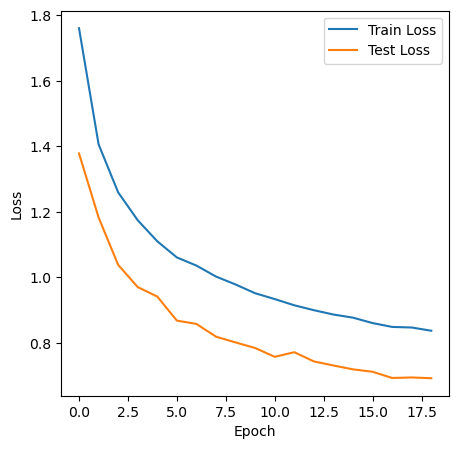

In [9]:
plot_loss(train_losses, test_losses)

In [10]:
from utils import plot_accuracy

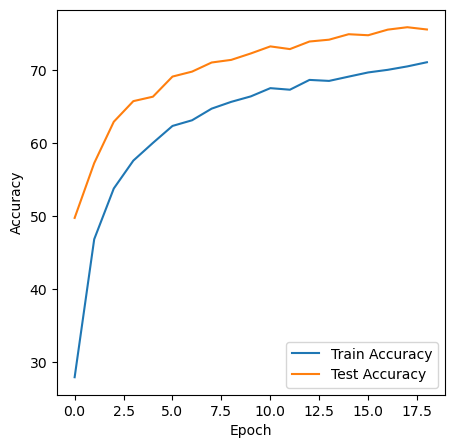

In [11]:
plot_accuracy(train_acc, test_acc)

# Display Misclassified images

G:\ERA_S8\model.py:362: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with 

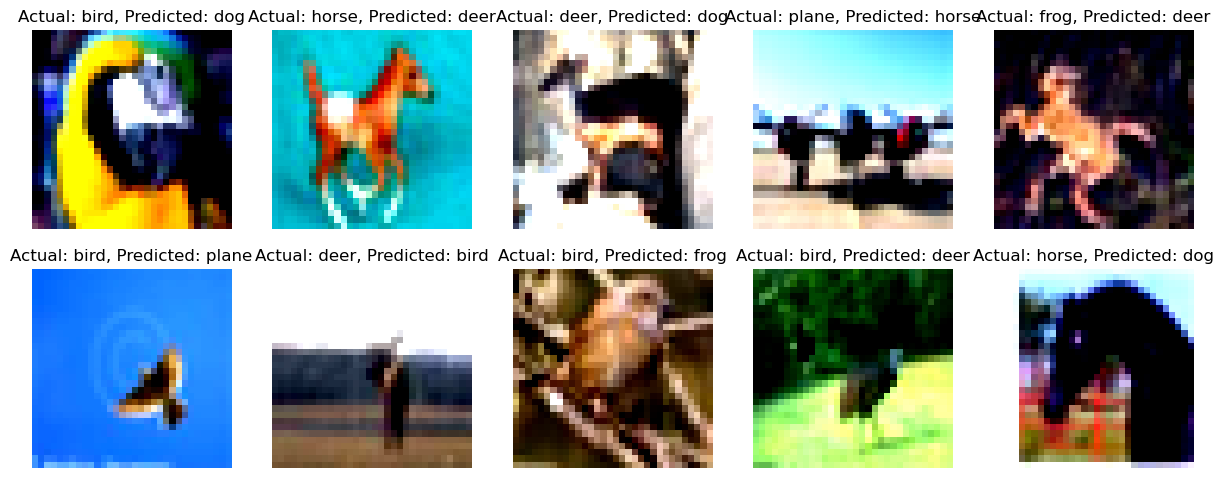

In [13]:
from misclassified_image import display_misclassfied_cifar10_images
classes = get_classes()
display_misclassfied_cifar10_images(test_loader, model, device, classes, 10)



Summary
=========
